In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
from tqdm import tqdm

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
!ls

Multivariate_stats.ipynb       followers__diff_dist.png
bar.png                        pictures_eda.ipynb
basic_stats.csv                pie.png
download_essential_stats.ipynb profiles-EDA.ipynb
follow_dist.png                profiles.csv
followedby_dist.png


In [3]:
stats = pd.read_csv("profiles.csv", index_col=0)

In [4]:
stats.head()

,_id,id,username,followedby,follow,postscount,post_0_comments,post_0_likes,post_1_comments,post_1_likes,...,post_5_comments,post_5_likes,post_6_comments,post_6_likes,post_7_comments,post_7_likes,post_8_comments,post_8_likes,post_9_comments,post_9_likes
0,5ea2811237fdd072e4bb2b85,1000037738,shmkristina,304,742,154,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5ea2811237fdd072e4bb2b86,1000070598,marie_vorobeva,517,397,758,3.0,69.0,0.0,57.0,...,0.0,70.0,2.0,60.0,2.0,67.0,5.0,81.0,5.0,80.0
2,5ea2811237fdd072e4bb2b87,10000300614,ann_drd,76,157,37,2.0,29.0,0.0,8.0,...,0.0,14.0,0.0,24.0,0.0,22.0,0.0,13.0,0.0,11.0
3,5ea2811237fdd072e4bb2b88,10000701611,nails.by.kuznetsova,365,865,185,0.0,3.0,0.0,11.0,...,2.0,20.0,2.0,8.0,0.0,9.0,0.0,9.0,0.0,16.0
4,5ea2811237fdd072e4bb2b89,10000714566,dp_kulakovski_ignatova,368,243,80,1.0,49.0,0.0,90.0,...,2.0,56.0,4.0,52.0,0.0,41.0,2.0,50.0,0.0,46.0


In [5]:
stats.describe()

,id,followedby,follow,postscount,post_0_comments,post_0_likes,post_1_comments,post_1_likes,post_2_comments,post_2_likes,...,post_5_comments,post_5_likes,post_6_comments,post_6_likes,post_7_comments,post_7_likes,post_8_comments,post_8_likes,post_9_comments,post_9_likes
count,1.119600e+05,1.119600e+05,111960.000000,111960.000000,111960.000000,111960.000000,111960.000000,111960.000000,111960.000000,111960.000000,...,111960.000000,111960.000000,111960.000000,111960.000000,111960.000000,111960.000000,111960.000000,111960.000000,111960.000000,111960.000000
mean,6.506897e+09,2.713148e+03,493.645704,374.399714,4.388791,75.975152,4.824661,82.823374,4.631065,87.638362,...,5.007565,90.747401,4.363228,93.494212,6.387504,99.617917,4.439175,97.752072,4.708655,97.779975
std,7.395390e+09,8.290955e+04,1171.202709,933.401384,78.535095,1042.925946,105.168118,1035.739624,69.940086,1190.046204,...,121.647388,1070.556999,59.454957,1455.416266,518.341076,2350.241412,76.512443,2146.090820,100.055237,1841.044767
min,5.350200e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.308643e+09,1.480000e+02,113.000000,45.000000,0.000000,13.000000,0.000000,14.000000,0.000000,14.000000,...,0.000000,14.000000,0.000000,14.000000,0.000000,14.000000,0.000000,13.000000,0.000000,13.000000
50%,1.989709e+09,3.670000e+02,248.000000,141.000000,1.000000,31.000000,1.000000,33.000000,1.000000,34.000000,...,1.000000,35.000000,1.000000,35.000000,1.000000,35.000000,0.000000,35.000000,0.000000,35.000000
75%,1.112828e+10,8.630000e+02,489.000000,408.000000,3.000000,63.000000,3.000000,67.000000,3.000000,69.000000,...,3.000000,71.000000,3.000000,72.000000,3.000000,72.000000,3.000000,73.000000,3.000000,73.000000
max,3.120027e+10,2.626624e+07,260478.000000,103802.000000,19140.000000,222978.000000,27949.000000,240381.000000,14908.000000,302512.000000,...,27059.000000,227621.000000,9004.000000,333891.000000,123725.000000,543874.000000,16953.000000,526528.000000,21131.000000,401257.000000


In [34]:
DISTRIBUTIONS = [        
    st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
    st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
    st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
    st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
    st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,
    st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
    st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
    st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
    st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
]

def rank_distribution_fitness(data: np.array, bins=50) -> list:
    
    fitness_results = list()
    
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    
    # Estimate distribution parameters from data
    for distribution in tqdm(DISTRIBUTIONS):

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                fitness_results.append((sse, distribution, params))

        except Exception as e:
            print(e)
        
    fitness_results.sort(key=lambda x: x[0])

    return fitness_results

def make_pdf(dist, params, size=10000) -> pd.Series:
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

def print_best(distribs, ax, data, bins=50):
    
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    
    pos = 0
    for _, distribution, params in distribs:
        pos += 1
        if pos >= 6:
            return
        
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]

        pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
        
         # if axis pass in add to plot
        try:
            if ax:
                pd.Series(pdf, x).plot(ax=ax)
            end
        except Exception:
            pass

## EDA

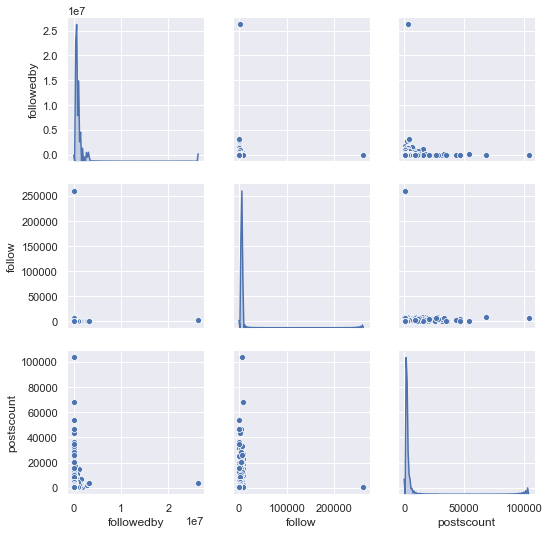

In [59]:
sns.pairplot(stats, vars=["followedby", "follow", "postscount"], diag_kind="kde");

## followedby

In [8]:
stats.followedby.describe()

count    1.119600e+05
mean     2.713148e+03
std      8.290955e+04
min      0.000000e+00
25%      1.480000e+02
50%      3.670000e+02
75%      8.630000e+02
max      2.626624e+07
Name: followedby, dtype: float64

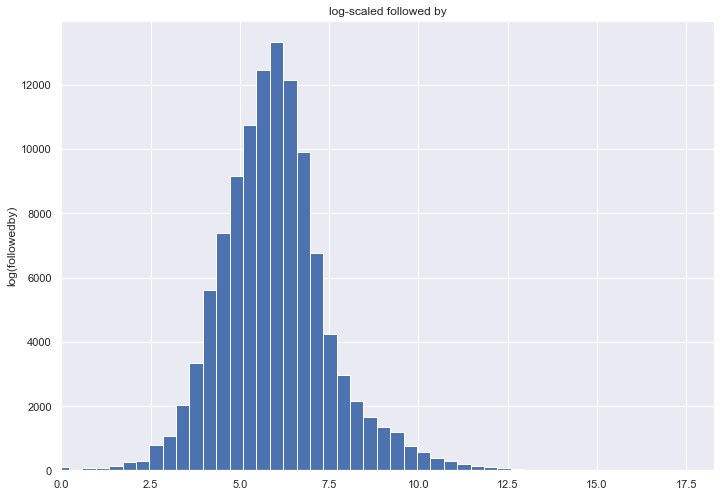

In [10]:
log_scale_followedby = np.log(stats.followedby.values + 0.001)
plt.hist(log_scale_followedby, bins=64)
plt.title("log-scaled followed by")
plt.xlabel('')
plt.ylabel('log(followedby)')
plt.xlim((0, None));

In [11]:
ranked_followby = rank_distribution_fitness(stats.followedby.values)

100%|██████████| 87/87 [12:44<00:00,  8.78s/it]


In [44]:
print(*ranked_followby[:2], sep='\n\n')

(2.0496491039780607e-13, <scipy.stats._continuous_distns.genhalflogistic_gen object at 0x181a025750>, (0.0006495321441604054, -40733.55319049838, 199317.03677845688))

(5.086748802137468e-13, <scipy.stats._continuous_distns.rdist_gen object at 0x181a076250>, (123.48067058384075, 97347.70034845214, 3130082.9313320573))


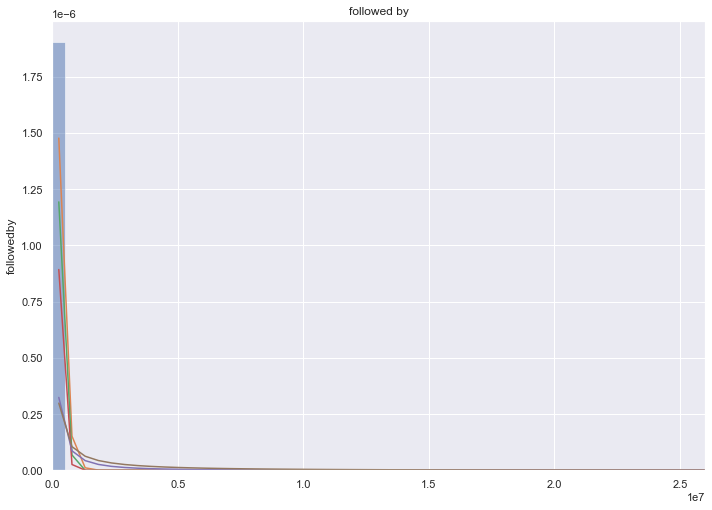

In [35]:
ax = stats.followedby.plot(kind='hist', bins=50, density=True, alpha=0.5)
print_best(ranked_followby, ax, stats.followedby.values)
plt.title("followed by")
plt.ylabel('followedby')
plt.xlim((0, None));

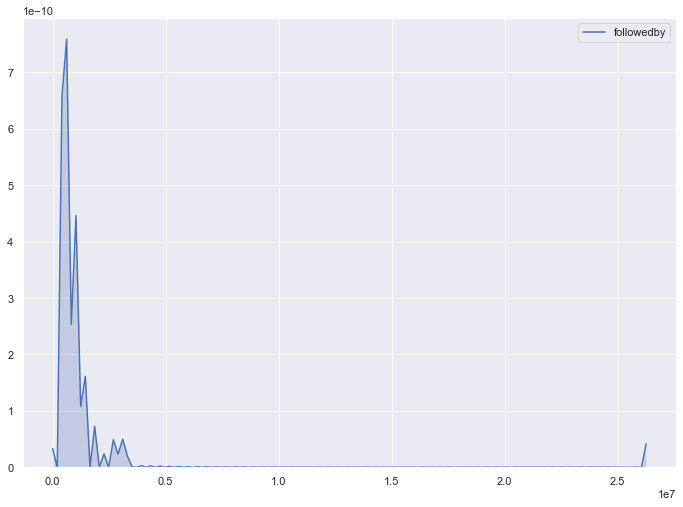

In [77]:
sns.kdeplot(stats.followedby, shade=True);

## followers

In [37]:
stats.followedby.describe()

count    1.119600e+05
mean     2.713148e+03
std      8.290955e+04
min      0.000000e+00
25%      1.480000e+02
50%      3.670000e+02
75%      8.630000e+02
max      2.626624e+07
Name: followedby, dtype: float64

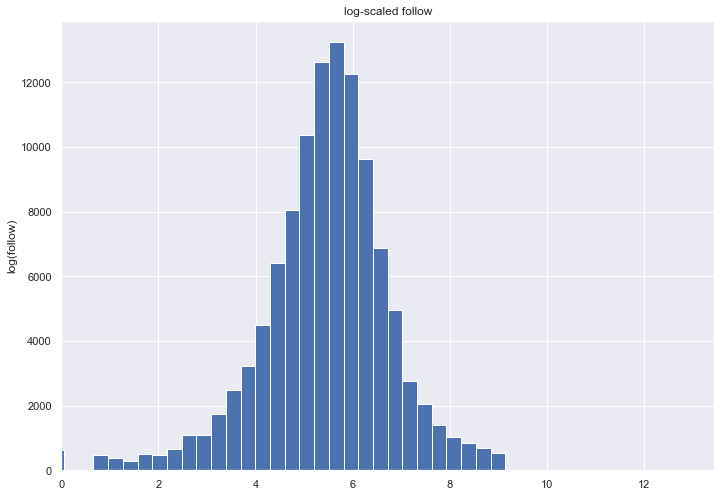

In [39]:
log_scale_follow = np.log(stats.follow.values + 0.001)
plt.hist(log_scale_follow, bins=64)
plt.title("log-scaled follow")
plt.xlabel('')
plt.ylabel('log(follow)')
plt.xlim((0, None));

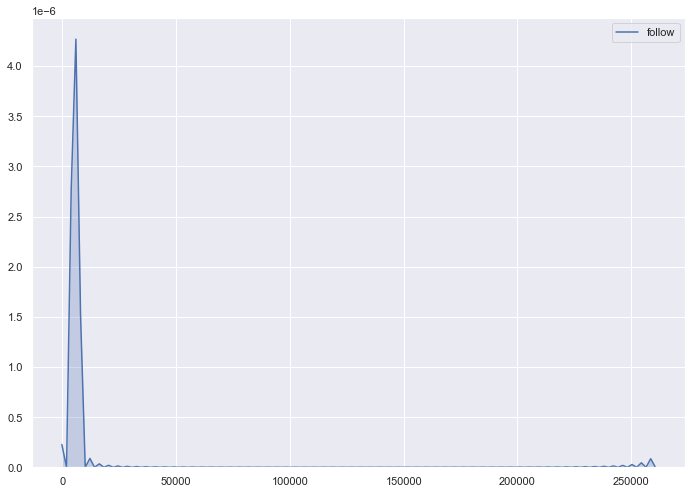

In [76]:
sns.kdeplot(stats.follow, shade=True);

## postscount

In [49]:
stats.postscount.describe()

count    111960.000000
mean        374.399714
std         933.401384
min           0.000000
25%          45.000000
50%         141.000000
75%         408.000000
max      103802.000000
Name: postscount, dtype: float64

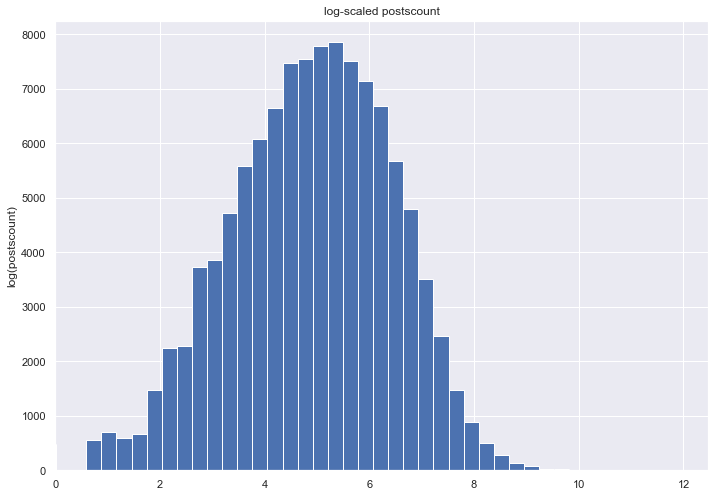

In [51]:
log_scale_postscount = np.log(stats.postscount + 0.001)
plt.hist(log_scale_postscount, bins=64)
plt.title("log-scaled postscount")
plt.xlabel('')
plt.ylabel('log(postscount)')
plt.xlim((0, None));

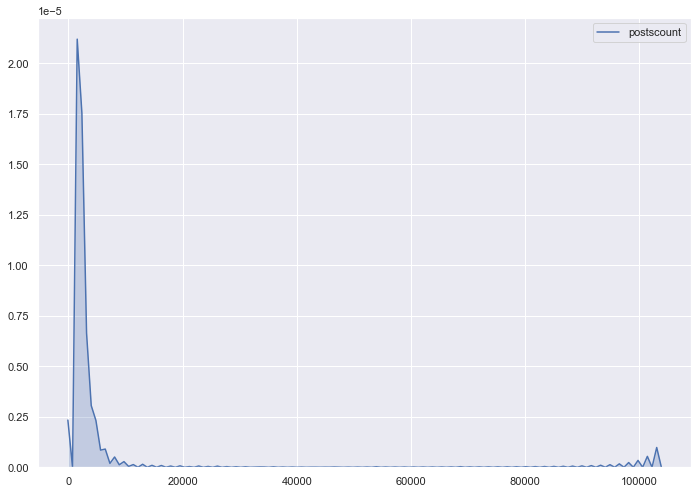

In [75]:
sns.kdeplot(stats.postscount, shade=True);

## posts

**Comments**

In [60]:
stats.post_0_comments.describe()

count    111960.000000
mean          4.388791
std          78.535095
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max       19140.000000
Name: post_0_comments, dtype: float64

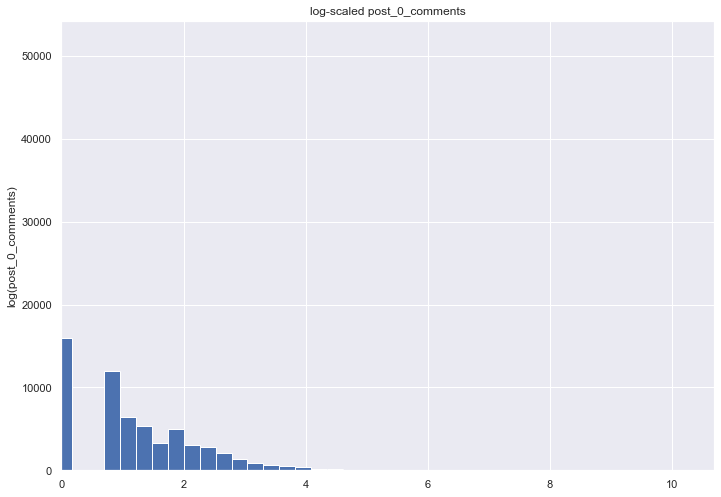

In [63]:
log_scale_post_0_comments = np.log(stats.post_0_comments + 0.001)
plt.hist(log_scale_post_0_comments, bins=64)
plt.title("log-scaled post_0_comments")
plt.xlabel('')
plt.ylabel('log(post_0_comments)')
plt.xlim((0, None));

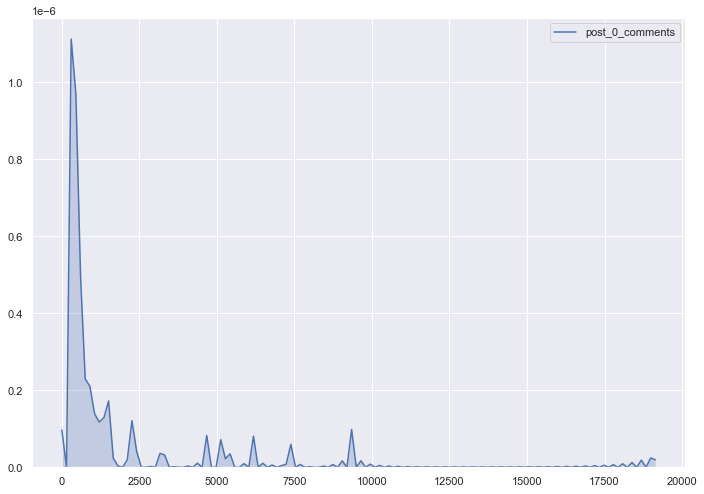

In [73]:
sns.kdeplot(stats.post_0_comments, shade=True);

**Likes**

In [64]:
stats.post_0_likes.describe()

count    111960.000000
mean         75.975152
std        1042.925946
min           0.000000
25%          13.000000
50%          31.000000
75%          63.000000
max      222978.000000
Name: post_0_likes, dtype: float64

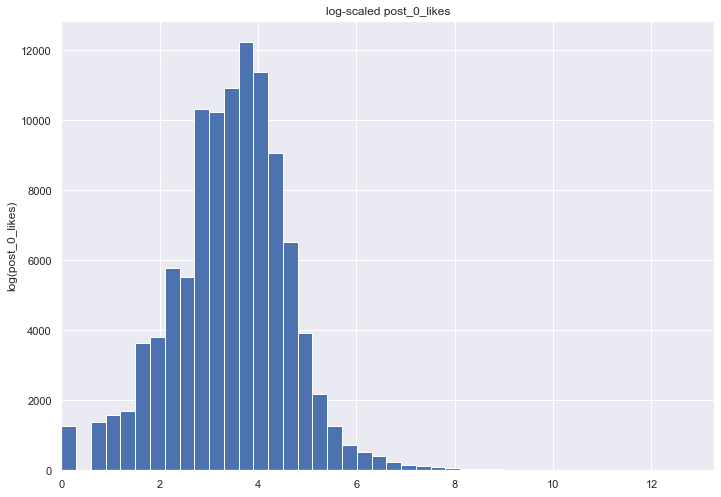

In [67]:
log_scale_post_0_likes = np.log(stats.post_0_likes + 0.001)
plt.hist(log_scale_post_0_likes, bins=64)
plt.title("log-scaled post_0_likes")
plt.xlabel('')
plt.ylabel('log(post_0_likes)')
plt.xlim((0, None));

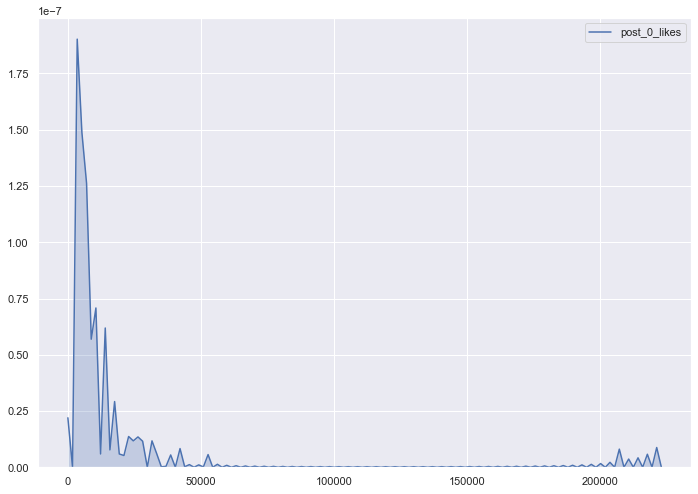

In [74]:
sns.kdeplot(stats.post_0_likes, shade=True);

## Joint distributions

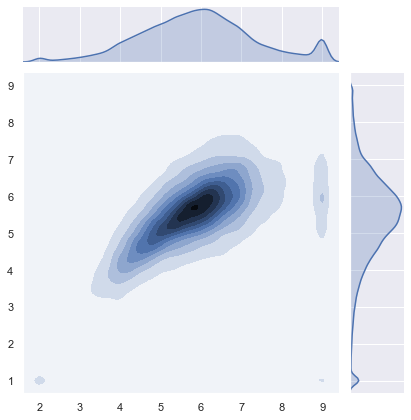

In [83]:
sns.jointplot(
    np.clip(log_scale_followedby, 2, 9), 
    np.clip(log_scale_follow, 1, 9),
    kind="kde");

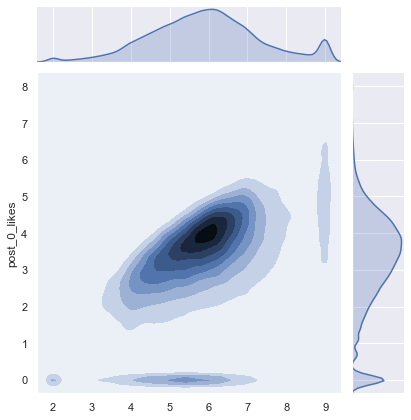

In [84]:
sns.jointplot(
    np.clip(log_scale_followedby, 2, 9), 
    np.clip(log_scale_post_0_likes, 0, 8),
    kind="kde");

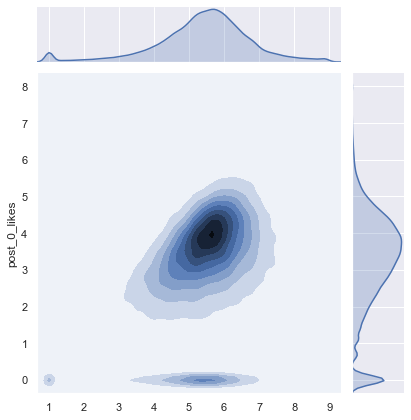

In [85]:
sns.jointplot(
    np.clip(log_scale_follow, 1, 9), 
    np.clip(log_scale_post_0_likes, 0, 8),
    kind="kde");

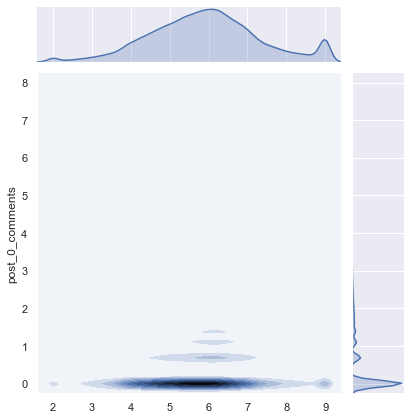

In [86]:
sns.jointplot(
    np.clip(log_scale_followedby, 2, 9), 
    np.clip(log_scale_post_0_comments, 0, 8),
    kind="kde");